In [1]:
"""영화리뷰분류 과제"""

'영화리뷰분류 과제'

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
import pandas as pd
pdata = pd.DataFrame(train_data)
pdata.head()

0
0  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1  [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2  [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3  [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4  [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...

In [4]:
word_index = imdb.get_word_index() 
   # 워드 임베딩한 결과!(by jjm)
   # max(reverse_word_index)를 실행하면 88584가 출력됨.

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
  # 0(패딩), 1(문서시작), 2(사전에 없음)을 위해 3씩 더 해져 있기 때문에 3씩을 빼주어야 한다.
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
"""1"""
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
"""
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
"""

"\nfrom tensorflow.keras import optimizers\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n             loss='binary_crossentropy',\n             metrics=['accuracy'])\n"

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=50,
                   batch_size=512,
                   callbacks=[early_stopping],
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 1s 90us/sample - loss: 0.4894 - acc: 0.7987 - val_loss: 0.3939 - val_acc: 0.8448
Epoch 2/50
15000/15000 [==============================] - 0s 33us/sample - loss: 0.2940 - acc: 0.9029 - val_loss: 0.2991 - val_acc: 0.8890
Epoch 3/50
15000/15000 [==============================] - 1s 34us/sample - loss: 0.2135 - acc: 0.9293 - val_loss: 0.2866 - val_acc: 0.8859
Epoch 4/50
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1709 - acc: 0.9447 - val_loss: 0.2762 - val_acc: 0.8879
Epoch 5/50
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1404 - acc: 0.9570 - val_loss: 0.2917 - val_acc: 0.8850
Epoch 6/50
15000/15000 [==============================] - 1s 35us/sample - loss: 0.1146 - acc: 0.9643 - val_loss: 0.3146 - val_acc: 0.8810


In [14]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 33us/sample - loss: 0.3352 - acc: 0.8692


In [15]:
results

[0.3351820193862915, 0.8692]

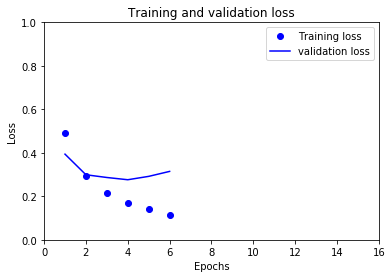

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.axis([0, 16, 0.0, 1.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

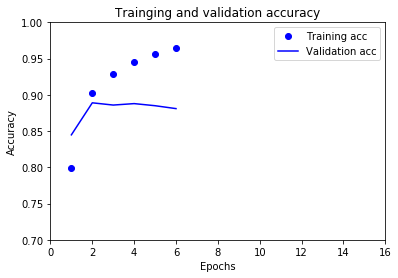

In [17]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainging and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 16, 0.7, 1.0])
plt.legend()
plt.show()